## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame, Series
import scipy.stats as st
import numpy as numpy


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
test_df=pd.merge(mouse_metadata,study_results,on="Mouse ID")

# Display the data table for preview
test_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
total_mice = len(test_df['Mouse ID'].unique())
total_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
test_df.loc[test_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep='first')]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
test_df[test_df["Mouse ID"]=="g989"]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = test_df[test_df["Mouse ID"]!="g989"]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mice = len(clean_df['Mouse ID'].unique())
clean_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
mean = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stdev = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
sum_stat = pd.DataFrame({
    "Mean": mean,
    "Median": median,
    "Variance": variance,
    "Standard Deviation": stdev,
    "SEM": sem
    }
    )
sum_stat

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Using the aggregation method, produce the same summary statistics in a single line
sum_stat.aggregate(['sum'])


,Mean,Median,Variance,Standard Deviation,SEM
sum,509.759822,499.02123,478.584399,68.211025,5.027853


In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
# Find the total number of drug measurements
counts = clean_df['Drug Regimen'].value_counts()

counts

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Drug Regimen, dtype: int64

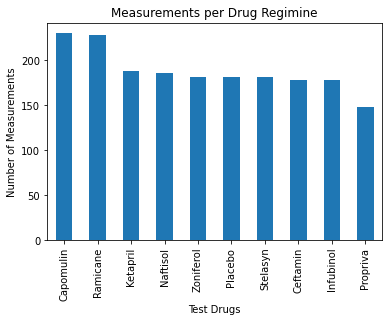

In [11]:
# Plot the measurements on a bar plot using Pandas
counts.plot(kind="bar")
plt.xlabel("Test Drugs")
plt.xticks(rotation=90)
plt.ylabel("Number of Measurements")
plt.title("Measurements per Drug Regimine")
plt.show() 




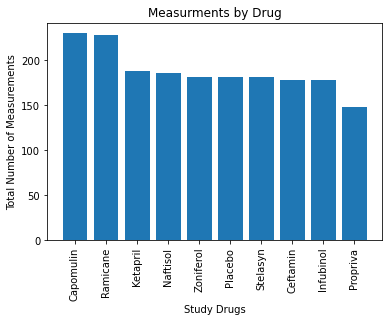

In [12]:
# Plot measurements taken on each drug regimen using pyplot.
counts = clean_df['Drug Regimen'].value_counts()
plt.bar(counts.index.values,counts.values)
plt.xlabel("Study Drugs")
plt.title("Measurments by Drug")
plt.xticks(rotation=90)
plt.ylabel("Total Number of Measurements")
plt.show()


In [13]:
# Get totals of Mice in test study
gendergp = clean_df.groupby('Sex')
genders = gendergp["Mouse ID"].nunique()
percentgp = (genders / clean_mice)*100

genderdf = pd.DataFrame(
    {'Percentage of Mice': percentgp,
    'Total Counts': genders
    }
    )
genderdf['Percentage of Mice'] = genderdf['Percentage of Mice'].map('{:.2f}%'.format)
genderdf


,Percentage of Mice,Total Counts
Sex,,
Female,49.60%,123
Male,50.40%,125


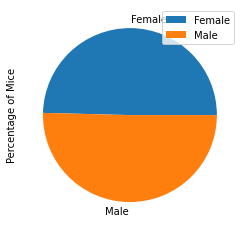

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
genderdf = pd.DataFrame(
    {'Percentage of Mice': percentgp,
    'Total Counts': genders
    }
    )
plot = genderdf.plot.pie(y='Percentage of Mice')
plt.legend
plt.show()



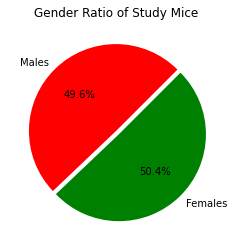

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Males", "Females"]
colors = ["red", "green"]
explode = [0, 0.05]
plt.pie(genders, labels=labels, autopct="%1.1f%%", startangle=45, colors=colors, explode=explode)
plt.title ("Gender Ratio of Study Mice")
plt.show()



## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
drug_tv = clean_df.sort_values(["Drug Regimen", "Mouse ID", "Timepoint"], ascending=True)

# Select final volume of each mouse 
final_tv_df = clean_df.loc[clean_df["Timepoint"] == 45]
final_tv_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1


In [17]:
max_mouse_timepoint = clean_df.groupby('Mouse ID')['Timepoint'].max()
max_mouse_timepoint.reset_index()

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
243,z435,10
244,z578,45
245,z581,45
246,z795,45


In [18]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

merged_df = pd.merge(max_mouse_timepoint, clean_df, how = 'left', on= ['Mouse ID','Timepoint'])
merged_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [19]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for treat in treatments:
    final_vol = merged_df.loc[merged_df['Drug Regimen']==treat, 'Tumor Volume (mm3)']
    tumor_vol_data.append(final_vol)
    
 
# Find the Quartiles
    quartiles = final_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    print(f"The lower quartile of treatments is: {lowerq}")
    print(f"The upper quartile of treatment is: {upperq}")
    print(f"The interquartile range of treatments is: {iqr}")
    print(f"The the median of treatment is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
# Outliers
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")





The lower quartile of treatments is: 32.37735684
The upper quartile of treatment is: 40.1592203
The interquartile range of treatments is: 7.781863460000004
The the median of treatment is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
The lower quartile of treatments is: 31.56046955
The upper quartile of treatment is: 40.65900627
The interquartile range of treatments is: 9.098536719999998
The the median of treatment is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
The lower quartile of treatments is: 54.04860769
The upper quartile of treatment is: 65.52574285
The interquartile range of treatments is: 11.477135160000003
The the median of treatment is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
The lower quartile of treatments is: 48.72207785
The upper quartile of treatment is: 64.29983003
T

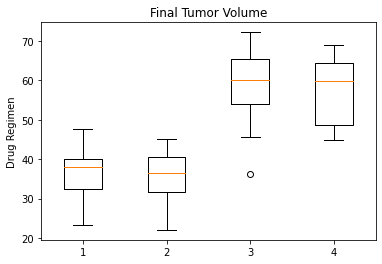

In [20]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume')
ax1.set_ylabel('Drug Regimen')
ax1.boxplot(tumor_vol_data)
plt.show()

## Line and Scatter Plots

In [21]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

m
for i in range(1):
    plt.plot(df.index, df[drugs[i]], marker = markers[i],color=colors[i], label=drugs[i] )

plt.legend(loc="upper right")
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Time (Days)')


NameError: name 'mc_db' is not defined

In [22]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
plt.scatter('merged_df.loc[:,1],merged_dfiloc[:,8])
plt.xlabel('Tumor Volume')
plt.ylabel('Mouse Weight')
plt.show()

NameError: name 'who_data' is not defined

## Correlation and Regression

In [23]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
